# Leave-One-Subject-Out Evaluation

In [18]:
import numpy as np
import re
import cv2
import dlib
from imutils import face_utils
import glob
import pickle
from random import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
import json
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import yaml
from scipy.spatial import distance as dist
import statistics
import matplotlib.pyplot as plt
from tqdm import tqdm,trange
from PIL import Image
from IPython.display import HTML
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from scipy import interp

# Custom Imports
from common_functions import get_camera_parameters,get_full_image_points,get_full_model_points,eye_aspect_ratio, generate_HTML_CM

***

In [19]:
# Load the dataset
with open('data_cleaned.json') as json_file:
    data_all = json.load(json_file)
# Extract the keys in sorted order
keys_all = sorted(data_all)
# Convert python list to np array
keys_all = np.asarray(keys_all)
# Load all the uuids
participants = glob.glob('dataset/*')

In [20]:
# Define global variables
DATASET_SIZE = len(keys_all)

# NUM_FEATURES = 22 # With the Iris Data
# NUM_FEATURES = 14 # Without the Iris Data
NUM_FEATURES = 142 # With all Dlib landmarks, rotation and translation matrix
# NUM_FEATURES = 150 # With all Dlib landmarks, rotation and translation matrix and Iris Data


NUM_OF_PARTICIPANTS = len(participants)
EAR_THRESHOLD = 0.14
DEBUG = False
MODEL_POINTS = get_full_model_points()

In [21]:
print("""Running attention prediction for {} participants and a total of {} images.
Each participant will be excluded from the training set once, our classifiers 
will be trained on the remaining participants and finally we will predict
the result for the one we left out. The total accuracy will be the mean value
of the accuracies of each participant""".format(NUM_OF_PARTICIPANTS, DATASET_SIZE))

Running attention prediction for 52 participants and a total of 2728 images.
Each participant will be excluded from the training set once, our classifiers 
will be trained on the remaining participants and finally we will predict
the result for the one we left out. The total accuracy will be the mean value
of the accuracies of each participant


In [22]:
# Remove all blink indices once
blinked_indices = []
with open("./blinked_images.txt", 'a') as out:
    for i in trange(DATASET_SIZE):
        # Get the 68 facial landmarks
        landmarks = data_all[keys_all[i]]['landmarks']
        # Blink Detection
        leftEAR = eye_aspect_ratio(landmarks[36:42])
        rightEAR = eye_aspect_ratio(landmarks[42:48])
        ear = (leftEAR + rightEAR) / 2.0
        if(ear <= EAR_THRESHOLD):
#             print("Blinked image is: {}".format(keys_all[i]))
            out.write(keys_all[i] + '\n')
            blinked_indices.append(i)
print("Length of dataset before blinked image removed : {}".format(keys_all.shape))
# Redefine global dataset size
keys_all = np.delete(keys_all, blinked_indices, axis=0)
DATASET_SIZE = len(keys_all)
print("Length of dataset after blinked image removed : {}".format(keys_all.shape))

100%|███████████████████████████████████████████████████████████████████████████| 2728/2728 [00:00<00:00, 6118.87it/s]

Length of dataset before blinked image removed : (2728,)
Length of dataset after blinked image removed : (2688,)


  0%|                                                                                          | 0/52 [00:00<?, ?it/s]

The subject's UUID exluded is: 04b7b555cd6d4d41bc2ec8ed6ee259e0


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
  2%|█▌                                                                                | 1/52 [00:15<13:32, 15.94s/it]

RF  #0 Accuracy: 0.886 | Precision: 0.95 | Recall: 0.84
SVM #0 Accuracy: 0.841 | Precision: 0.95 | Recall: 0.76
The subject's UUID exluded is: 05d77af9b4ce4de5b0f631f685601d41


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
  4%|███▏                                                                              | 2/52 [00:33<13:45, 16.52s/it]

RF  #1 Accuracy: 0.672 | Precision: 0.71 | Recall: 0.77
SVM #1 Accuracy: 0.724 | Precision: 0.91 | Recall: 0.6
The subject's UUID exluded is: 05e84e3f8e6344f5baaf003543df8d3a


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
  6%|████▋                                                                             | 3/52 [00:50<13:26, 16.46s/it]

RF  #2 Accuracy: 0.75 | Precision: 0.7 | Recall: 0.9
SVM #2 Accuracy: 0.74 | Precision: 0.75 | Recall: 0.73
The subject's UUID exluded is: 0656f5fe35a54d1589e526a702f578b0


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
  8%|██████▎                                                                           | 4/52 [01:05<12:51, 16.08s/it]

RF  #3 Accuracy: 0.781 | Precision: 0.78 | Recall: 0.82
SVM #3 Accuracy: 0.812 | Precision: 0.92 | Recall: 0.71
The subject's UUID exluded is: 0c69c12c3544409f82fbcc522fb522f8


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 10%|███████▉                                                                          | 5/52 [01:19<12:12, 15.58s/it]

RF  #4 Accuracy: 0.753 | Precision: 0.72 | Recall: 0.84
SVM #4 Accuracy: 0.722 | Precision: 0.78 | Recall: 0.64
The subject's UUID exluded is: 0e55dc4aec5e442f86b809cacdec3b68


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 12%|█████████▍                                                                        | 6/52 [01:34<11:46, 15.35s/it]

RF  #5 Accuracy: 0.419 | Precision: 0.47 | Recall: 0.65
SVM #5 Accuracy: 0.488 | Precision: 0.52 | Recall: 0.65
The subject's UUID exluded is: 0e7047653b014264b33c1c3620e506f8


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 13%|███████████                                                                       | 7/52 [01:50<11:40, 15.57s/it]

RF  #6 Accuracy: 0.533 | Precision: 0.56 | Recall: 0.58
SVM #6 Accuracy: 0.289 | Precision: 0.32 | Recall: 0.29
The subject's UUID exluded is: 149797134bae4deaac692a73bf162fe9


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 15%|████████████▌                                                                     | 8/52 [02:06<11:34, 15.79s/it]

RF  #7 Accuracy: 0.747 | Precision: 0.78 | Recall: 0.8
SVM #7 Accuracy: 0.72 | Precision: 0.85 | Recall: 0.64
The subject's UUID exluded is: 2cc97c9c49cb4f03ae978d1eb73f304b


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 17%|██████████████▏                                                                   | 9/52 [02:22<11:20, 15.83s/it]

RF  #8 Accuracy: 0.655 | Precision: 0.94 | Recall: 0.65
SVM #8 Accuracy: 0.793 | Precision: 1.0 | Recall: 0.77
The subject's UUID exluded is: 319c7f878ccb4d53948c4b338cc1732a


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 19%|███████████████▌                                                                 | 10/52 [02:38<10:59, 15.69s/it]

RF  #9 Accuracy: 0.551 | Precision: 0.56 | Recall: 0.56
SVM #9 Accuracy: 0.571 | Precision: 0.61 | Recall: 0.44
The subject's UUID exluded is: 36d8e15f7e164b5c980492c4c6019322


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 21%|█████████████████▏                                                               | 11/52 [02:52<10:30, 15.38s/it]

RF  #10 Accuracy: 0.76 | Precision: 0.76 | Recall: 0.78
SVM #10 Accuracy: 0.833 | Precision: 0.84 | Recall: 0.84
The subject's UUID exluded is: 3c243889b1c547418c69b234216cea7d


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 23%|██████████████████▋                                                              | 12/52 [03:07<10:11, 15.28s/it]

RF  #11 Accuracy: 0.532 | Precision: 0.6 | Recall: 0.36
SVM #11 Accuracy: 0.766 | Precision: 0.85 | Recall: 0.68
The subject's UUID exluded is: 3ef8c45b30ec40cb90526280c04dec0a


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 25%|████████████████████▎                                                            | 13/52 [03:23<09:58, 15.34s/it]

RF  #12 Accuracy: 0.773 | Precision: 0.82 | Recall: 0.76
SVM #12 Accuracy: 0.841 | Precision: 0.87 | Recall: 0.84
The subject's UUID exluded is: 46056754fae5429e975f17d143673451


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 27%|█████████████████████▊                                                           | 14/52 [03:38<09:39, 15.25s/it]

RF  #13 Accuracy: 0.806 | Precision: 0.86 | Recall: 0.86
SVM #13 Accuracy: 0.774 | Precision: 0.89 | Recall: 0.77
The subject's UUID exluded is: 49102755134149d98bec4d88dec02a3c


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 29%|███████████████████████▎                                                         | 15/52 [03:53<09:20, 15.15s/it]

RF  #14 Accuracy: 0.426 | Precision: 0.47 | Recall: 0.64
SVM #14 Accuracy: 0.468 | Precision: 0.5 | Recall: 0.48
The subject's UUID exluded is: 493e717904f744978a20292fb4adddaa


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 31%|████████████████████████▉                                                        | 16/52 [04:08<09:05, 15.14s/it]

RF  #15 Accuracy: 0.75 | Precision: 0.69 | Recall: 0.92
SVM #15 Accuracy: 0.75 | Precision: 0.74 | Recall: 0.77
The subject's UUID exluded is: 50b8db359b164716b59c5e3a9fd001f7


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 33%|██████████████████████████▍                                                      | 17/52 [04:23<08:49, 15.12s/it]

RF  #16 Accuracy: 0.55 | Precision: 0.64 | Recall: 0.58
SVM #16 Accuracy: 0.5 | Precision: 0.62 | Recall: 0.42
The subject's UUID exluded is: 5f85582c5f1b40b48440af9c34ff3249


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 35%|████████████████████████████                                                     | 18/52 [04:38<08:32, 15.09s/it]

RF  #17 Accuracy: 0.738 | Precision: 0.81 | Recall: 0.71
SVM #17 Accuracy: 0.81 | Precision: 0.83 | Recall: 0.83
The subject's UUID exluded is: 61176f72b54241a2aaac74181926195a


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 37%|█████████████████████████████▌                                                   | 19/52 [04:53<08:14, 14.98s/it]

RF  #18 Accuracy: 0.667 | Precision: 0.67 | Recall: 0.72
SVM #18 Accuracy: 0.875 | Precision: 0.95 | Recall: 0.8
The subject's UUID exluded is: 64a48116536441ee926f0430ca699153


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 38%|███████████████████████████████▏                                                 | 20/52 [05:07<07:55, 14.85s/it]

RF  #19 Accuracy: 0.559 | Precision: 0.77 | Recall: 0.5
SVM #19 Accuracy: 0.515 | Precision: 0.74 | Recall: 0.43
The subject's UUID exluded is: 662b0d4736bf4e60858cd03cd107af90


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 40%|████████████████████████████████▋                                                | 21/52 [05:22<07:42, 14.93s/it]

RF  #20 Accuracy: 0.592 | Precision: 0.82 | Recall: 0.61
SVM #20 Accuracy: 0.592 | Precision: 0.88 | Recall: 0.55
The subject's UUID exluded is: 6ae20e8b86424bc4a624abb83aa2c9f7


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 42%|██████████████████████████████████▎                                              | 22/52 [05:37<07:27, 14.91s/it]

RF  #21 Accuracy: 0.476 | Precision: 0.59 | Recall: 0.4
SVM #21 Accuracy: 0.452 | Precision: 0.6 | Recall: 0.24
The subject's UUID exluded is: 6b89f5b57aad44de9dc40896b024fad4


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 44%|███████████████████████████████████▊                                             | 23/52 [05:52<07:13, 14.96s/it]

RF  #22 Accuracy: 0.5 | Precision: 0.67 | Recall: 0.64
SVM #22 Accuracy: 0.767 | Precision: 0.94 | Recall: 0.73
The subject's UUID exluded is: 744055ae2e9e4d379108bbdbfab4dae5


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 46%|█████████████████████████████████████▍                                           | 24/52 [06:08<07:02, 15.08s/it]

RF  #23 Accuracy: 0.333 | Precision: 0.29 | Recall: 0.4
SVM #23 Accuracy: 0.583 | Precision: 0.5 | Recall: 0.2
The subject's UUID exluded is: 7a45e3e8ed4b4774ae98254fd364f2ca


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 48%|██████████████████████████████████████▉                                          | 25/52 [06:23<06:46, 15.06s/it]

RF  #24 Accuracy: 0.775 | Precision: 0.83 | Recall: 0.79
SVM #24 Accuracy: 0.85 | Precision: 1.0 | Recall: 0.75
The subject's UUID exluded is: 7c6b6801ba3245bbb10dc6a7b9996d88


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 50%|████████████████████████████████████████▌                                        | 26/52 [06:38<06:33, 15.14s/it]

RF  #25 Accuracy: 0.824 | Precision: 0.8 | Recall: 1.0
SVM #25 Accuracy: 0.882 | Precision: 0.88 | Recall: 0.96
The subject's UUID exluded is: 7d9be1d9b22e4a229b71dbf12f339243


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 52%|██████████████████████████████████████████                                       | 27/52 [06:55<06:28, 15.53s/it]

RF  #26 Accuracy: 0.462 | Precision: 0.62 | Recall: 0.56
SVM #26 Accuracy: 0.385 | Precision: 0.57 | Recall: 0.44
The subject's UUID exluded is: 8036631b52854bdda33a928371100eca


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 54%|███████████████████████████████████████████▌                                     | 28/52 [07:10<06:08, 15.37s/it]

RF  #27 Accuracy: 0.45 | Precision: 0.57 | Recall: 0.33
SVM #27 Accuracy: 0.45 | Precision: 0.57 | Recall: 0.33
The subject's UUID exluded is: 80b077000f3442dd9aba3339a0fb237c


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 56%|█████████████████████████████████████████████▏                                   | 29/52 [07:25<05:53, 15.36s/it]

RF  #28 Accuracy: 0.612 | Precision: 0.59 | Recall: 0.8
SVM #28 Accuracy: 0.85 | Precision: 0.89 | Recall: 0.8
The subject's UUID exluded is: 80be680d12c84471a3169d1e80b5d7ec


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 58%|██████████████████████████████████████████████▋                                  | 30/52 [07:40<05:33, 15.17s/it]

RF  #29 Accuracy: 0.576 | Precision: 0.55 | Recall: 0.69
SVM #29 Accuracy: 0.761 | Precision: 0.85 | Recall: 0.62
The subject's UUID exluded is: 9329bc5c6bd24234969dfb50a1a9ca87


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 60%|████████████████████████████████████████████████▎                                | 31/52 [07:56<05:24, 15.44s/it]

RF  #30 Accuracy: 0.602 | Precision: 0.61 | Recall: 0.6
SVM #30 Accuracy: 0.677 | Precision: 0.79 | Recall: 0.49
The subject's UUID exluded is: 9862478b2a6e4afc82af7fd08873a0b4


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 62%|█████████████████████████████████████████████████▊                               | 32/52 [08:15<05:34, 16.72s/it]

RF  #31 Accuracy: 0.62 | Precision: 0.62 | Recall: 0.6
SVM #31 Accuracy: 0.86 | Precision: 0.91 | Recall: 0.8
The subject's UUID exluded is: 9be7464cb93a49f69e6d9a330eb3715a


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 63%|███████████████████████████████████████████████████▍                             | 33/52 [08:31<05:11, 16.40s/it]

RF  #32 Accuracy: 0.747 | Precision: 0.7 | Recall: 0.84
SVM #32 Accuracy: 0.89 | Precision: 0.85 | Recall: 0.93
The subject's UUID exluded is: 9ed2ca01d30041aab1979f89cfdfa3cd


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 65%|████████████████████████████████████████████████████▉                            | 34/52 [08:48<04:58, 16.60s/it]

RF  #33 Accuracy: 0.754 | Precision: 0.9 | Recall: 0.76
SVM #33 Accuracy: 0.723 | Precision: 0.94 | Recall: 0.67
The subject's UUID exluded is: 9ef5c8cde44048f092b8625918b04986


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 67%|██████████████████████████████████████████████████████▌                          | 35/52 [09:04<04:39, 16.44s/it]

RF  #34 Accuracy: 0.731 | Precision: 0.79 | Recall: 0.74
SVM #34 Accuracy: 0.782 | Precision: 0.91 | Recall: 0.7
The subject's UUID exluded is: a50942013ca04ebdb2f9b172ca373f2c


c:\users\ale\anaconda3\envs\thesis\lib\site-packages\sklearn\metrics\_ranking.py:798: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "
c:\users\ale\anaconda3\envs\thesis\lib\site-packages\sklearn\metrics\_ranking.py:88: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 69%|████████████████████████████████████████████████████████                         | 36/52 [09:24<04:40, 17.55s/it]

RF  #35 Accuracy: 0.438 | Precision: 1.0 | Recall: 0.44
SVM #35 Accuracy: 0.25 | Precision: 1.0 | Recall: 0.25
The subject's UUID exluded is: a75222d8b947422eae2b4efc35296423


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 71%|█████████████████████████████████████████████████████████▋                       | 37/52 [09:40<04:14, 16.99s/it]

RF  #36 Accuracy: 0.719 | Precision: 0.7 | Recall: 0.82
SVM #36 Accuracy: 0.844 | Precision: 0.88 | Recall: 0.82
The subject's UUID exluded is: a7f3a3a5d6764aa69a77b71dc448e5e6


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 73%|███████████████████████████████████████████████████████████▏                     | 38/52 [09:55<03:49, 16.39s/it]

RF  #37 Accuracy: 0.677 | Precision: 0.7 | Recall: 0.64
SVM #37 Accuracy: 0.828 | Precision: 0.92 | Recall: 0.72
The subject's UUID exluded is: b078965557a54caaa856046ca7c30291


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 75%|████████████████████████████████████████████████████████████▊                    | 39/52 [10:11<03:29, 16.13s/it]

RF  #38 Accuracy: 0.783 | Precision: 0.83 | Recall: 0.77
SVM #38 Accuracy: 0.826 | Precision: 1.0 | Recall: 0.69
The subject's UUID exluded is: b676104c35e54ddf9579d67765f6d4a2


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 77%|██████████████████████████████████████████████████████████████▎                  | 40/52 [10:26<03:12, 16.01s/it]

RF  #39 Accuracy: 0.7 | Precision: 0.96 | Recall: 0.59
SVM #39 Accuracy: 0.633 | Precision: 1.0 | Recall: 0.46
The subject's UUID exluded is: baeac84e5d074afa9d6b7a9e9b82d8ac


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 79%|███████████████████████████████████████████████████████████████▊                 | 41/52 [10:43<02:57, 16.17s/it]

RF  #40 Accuracy: 0.8 | Precision: 0.76 | Recall: 0.88
SVM #40 Accuracy: 0.85 | Precision: 0.93 | Recall: 0.76
The subject's UUID exluded is: bbdaa54f85c34395b9dd512f068a1229


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 81%|█████████████████████████████████████████████████████████████████▍               | 42/52 [10:59<02:41, 16.17s/it]

RF  #41 Accuracy: 0.5 | Precision: 0.54 | Recall: 0.58
SVM #41 Accuracy: 0.682 | Precision: 0.78 | Recall: 0.58
The subject's UUID exluded is: c288292040ec473f908130877697a383


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 83%|██████████████████████████████████████████████████████████████████▉              | 43/52 [11:15<02:24, 16.11s/it]

RF  #42 Accuracy: 0.515 | Precision: 0.52 | Recall: 0.76
SVM #42 Accuracy: 0.803 | Precision: 0.8 | Recall: 0.82
The subject's UUID exluded is: c308cc95412b428db8d4020a6ab826d5


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 85%|████████████████████████████████████████████████████████████████████▌            | 44/52 [11:31<02:07, 15.97s/it]

RF  #43 Accuracy: 0.558 | Precision: 0.59 | Recall: 0.57
SVM #43 Accuracy: 0.698 | Precision: 1.0 | Recall: 0.43
The subject's UUID exluded is: c823b3cc2ed0484d9759cac9981031ed


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 87%|██████████████████████████████████████████████████████████████████████           | 45/52 [11:47<01:52, 16.00s/it]

RF  #44 Accuracy: 0.506 | Precision: 0.57 | Recall: 0.57
SVM #44 Accuracy: 0.543 | Precision: 0.63 | Recall: 0.48
The subject's UUID exluded is: cebaaf0546e94fcb96c1a186838a73af


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 88%|███████████████████████████████████████████████████████████████████████▋         | 46/52 [12:06<01:41, 16.89s/it]

RF  #45 Accuracy: 0.404 | Precision: 0.41 | Recall: 0.38
SVM #45 Accuracy: 0.319 | Precision: 0.28 | Recall: 0.21
The subject's UUID exluded is: d456335e901547d78d5a11e14155353f


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 90%|█████████████████████████████████████████████████████████████████████████▏       | 47/52 [12:23<01:25, 17.02s/it]

RF  #46 Accuracy: 0.75 | Precision: 0.83 | Recall: 0.85
SVM #46 Accuracy: 0.767 | Precision: 0.97 | Recall: 0.72
The subject's UUID exluded is: d621bfd6fb614aa792e08d7e4cfa897a


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 92%|██████████████████████████████████████████████████████████████████████████▊      | 48/52 [12:41<01:08, 17.22s/it]

RF  #47 Accuracy: 0.625 | Precision: 0.71 | Recall: 0.67
SVM #47 Accuracy: 0.5 | Precision: 0.67 | Recall: 0.4
The subject's UUID exluded is: d824f0d3d56f41b4946aba7c9f6c3cfd


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 94%|████████████████████████████████████████████████████████████████████████████▎    | 49/52 [12:57<00:50, 16.91s/it]

RF  #48 Accuracy: 0.727 | Precision: 0.71 | Recall: 0.83
SVM #48 Accuracy: 0.727 | Precision: 0.75 | Recall: 0.75
The subject's UUID exluded is: e11100236f0d4c1398f1e554a3560331


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 96%|█████████████████████████████████████████████████████████████████████████████▉   | 50/52 [13:15<00:34, 17.19s/it]

RF  #49 Accuracy: 0.686 | Precision: 0.56 | Recall: 0.77
SVM #49 Accuracy: 0.771 | Precision: 0.69 | Recall: 0.69
The subject's UUID exluded is: eda516a9dbe84e00a905cce2172b30c9


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
 98%|███████████████████████████████████████████████████████████████████████████████▍ | 51/52 [13:32<00:17, 17.16s/it]

RF  #50 Accuracy: 0.84 | Precision: 1.0 | Recall: 0.82
SVM #50 Accuracy: 0.84 | Precision: 1.0 | Recall: 0.82
The subject's UUID exluded is: f4e9d804730947a78e8251b35f2f519e


<ipython-input-23-a7a0a08654ae>:222: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
100%|█████████████████████████████████████████████████████████████████████████████████| 52/52 [13:47<00:00, 15.92s/it]


RF  #51 Accuracy: 0.541 | Precision: 0.67 | Recall: 0.45
SVM #51 Accuracy: 0.622 | Precision: 0.79 | Recall: 0.5


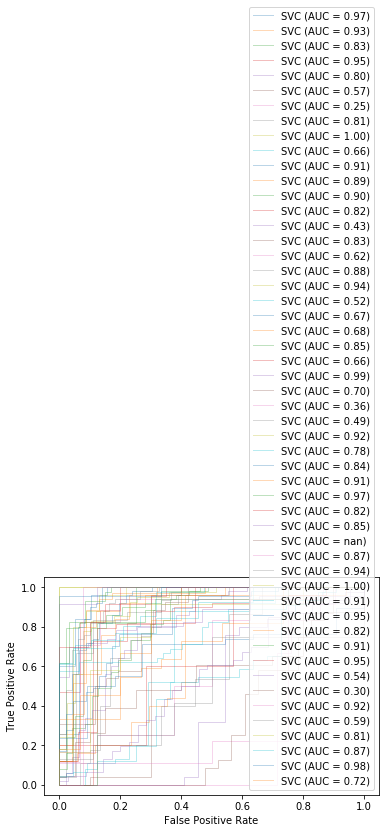

In [23]:
# Total weighted metrics, taking into account the size of each participant's dataset
accuracy_rf = []
accuracy_svm = []
precision_rf = []
precision_svm = []
recall_rf = []
recall_svm = []

# Total metrics without taking into account the size of each dataset. That is, calculate
# the metric for each participant and take the mean of the 52 metrics
accuracy_rf_raw = []
accuracy_svm_raw = []
precision_rf_raw = []
precision_svm_raw = []
recall_rf_raw = []
recall_svm_raw = []

# Array to keep track of subjects with low score
low_score_subjects_rf = []
low_score_subjects_svm = []

# Arrays to plot the probabilities with respect to the classes(0 or 1)
positive_probs_rf = []
negative_probs_rf = []
positive_probs_svm = []
negative_probs_svm = []

# Calculate AVG metrics
Confusion_Matrix_SVM = []
Confusion_Matrix_RF = []

# avg ROC creation
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Leave one out implementation.
# Loop over each participant and exclude him/her from the dataset each time
for j in trange(NUM_OF_PARTICIPANTS):
    # Extract the UUID
    participants[j]=participants[j].replace('\\', '/')
    uuid_excluded = participants[j].split('/')[1]
    
    print("The subject's UUID exluded is: {}".format(uuid_excluded))

    # Loop over the dataset to remove the examples associated with this participant
    # indices are the indexes of the excluded participant images
    indices_excluded = []
    # Keys are the UUID of the excluded participant images
    keys_excluded = []
    for i in range(DATASET_SIZE):
        key = keys_all[i]
        uuid = key.split('/')[0]
        if(uuid == uuid_excluded):
            indices_excluded.append(i)
            keys_excluded.append(key)      
    # From here comment if I want to load again the classifiers
    keys = np.delete(keys_all, indices_excluded)
    CURRENT_DATASET_SIZE = keys.shape[0]

    # Initialize our training dataset
    X = np.zeros((CURRENT_DATASET_SIZE, NUM_FEATURES))
    y = np.zeros(CURRENT_DATASET_SIZE)

    # Indices where SolvePnP failed
    failed_indices = []

    # Loop over each example of the remaining dataset to construct the training set
    for i in range(CURRENT_DATASET_SIZE):
        
        # Retrieve the key for this example
        key = keys[i]
        
        # Read the image and save the size
        im = Image.open('dataset/' + key)
        size = im.size[::-1] # reverse the array width-height
            
        # Get the 68 facial landmarks
        landmarks = data_all[key]['landmarks']
        
        # Use the above landmarks to generate image points in the 
        # form that solvePnP() takes as input
        image_points = get_full_image_points(landmarks)
        
        # Get camera parameters to feed into solvePnP()
        camera_matrix, dist_coeffs = get_camera_parameters(size)

        # Solve the PnP problem with the parameters specified above
        # and obtain rotation and translation vectors
        (success, rotation_vector, translation_vector) = cv2.solvePnP(
            MODEL_POINTS, image_points, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE
            )

        
        # Iris location features
        iris_right = np.reshape(np.asarray(data_all[key]['iris_right']), (2, 1))
        iris_left = np.reshape(np.asarray(data_all[key]['iris_left']), (2, 1))

        # Difference vector features
        left_vector = np.asarray( (abs(iris_left[0] - landmarks[39]['x']), abs(iris_left[1] - landmarks[39]['y'])) )
        right_vector = np.asarray( (abs(iris_right[0] - landmarks[42]['x']), abs(iris_right[1] - landmarks[42]['y'])) )
        
        # With all Dlib landmarks
        first_features = np.concatenate((rotation_vector, translation_vector), axis=0).ravel()
        
        # With all Dlib landmarks and Iris
#         first_features = np.concatenate((rotation_vector, translation_vector,iris_left, iris_right, left_vector, right_vector), axis=0).ravel()
    
        X[i, :] = np.hstack((first_features,image_points.flatten()))
        
        
        # Check if it is positive or negative example and set the groundtruth value accordingly
        output = key.split('/')[1]
        if(output == 'positive'):
            y[i] = 1
        elif(output == 'negative'):
            y[i] = 0
       
        # Remove examples that SolvePnP crashed
        if(X[i, 0] > 10000 or not success):
            print("Image crashed PnP : {}".format(key))
            failed_indices.append(i)
    # Delete indices that solvePnP failed to solve correctly
    X = np.delete(X, failed_indices, axis=0)
    y = np.delete(y, failed_indices, axis=0)
    
    # Reshape from (CURRENT_DATASET_SIZE, NUM_FEATURES, 1)
    # to           (CURRENT_DATASET_SIZE, NUM_FEATURES, )  for compatibility reasons
    X = X.squeeze()
    
    # Normalize features to have 0 mean and 1 variance
    m = X.mean(axis=0)
    std = X.std(axis=0)
    X_scaled = (X - m)/std
    
    # Train the classifiers
    X_train, y_train = X_scaled, y

    rf_classifier = RandomForestClassifier(n_estimators=500, random_state=1)
    rf_classifier.fit(X_train, y_train)

    svm_classifier = svm.SVC(C=10, kernel='rbf', gamma='scale', probability=True) # For probabilities
    svm_classifier.fit(X_train, y_train)


    ### End of training phase, continue with the validation set ###

    # Construct the validation dataset consisting of examples of a single participant
    # Evaluation of the classifiers will be done on this dataset
    X_eval = np.zeros((len(keys_excluded), NUM_FEATURES))
    y_eval = np.zeros(len(keys_excluded))
    # Perform the same steps as the consturction of the training dataset
    # This part could be merged with the above for loop and make it more elegant
    for i in range(len(keys_excluded)):
        key = keys_excluded[i]
        
        uuid = key.split('/')[0]
        
        im = Image.open('dataset/' + key)
        size = im.size[::-1] # reverse the array width-height

        landmarks = data_all[key]['landmarks']
        
        camera_matrix, dist_coeffs = get_camera_parameters(size)
        
        image_points = get_full_image_points(landmarks)

        (success, rotation_vector, translation_vector) = cv2.solvePnP(
            MODEL_POINTS, image_points, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE
            )

        iris_right = np.reshape(np.asarray(data_all[key]['iris_right']), (2, 1))
        iris_left = np.reshape(np.asarray(data_all[key]['iris_left']), (2, 1))
        left_vector = np.asarray( (abs(iris_left[0] - landmarks[39]['x']), abs(iris_left[1] - landmarks[39]['y'])) )
        right_vector = np.asarray( (abs(iris_right[0] - landmarks[42]['x']), abs(iris_right[1] - landmarks[42]['y'])) )
        

        # With all Dlib points
        first_features = np.concatenate((rotation_vector, translation_vector), axis=0).ravel()

#         # With all Dlib landmarks and Iris
#         first_features = np.concatenate((rotation_vector, translation_vector,iris_left, iris_right,left_vector, right_vector), axis=0).ravel()
    
        X_eval[i, :] = np.hstack((first_features,image_points.flatten()))
        
        output = key.split('/')[1]
        if(output == 'positive'):
            y_eval[i] = 1
        elif(output == 'negative'):
            y_eval[i] = 0
        

    X_eval = X_eval.squeeze()
    

    # Feature Normalization
    m_eval = X_eval.mean(axis=0)
    std_eval = X_eval.std(axis=0)
    X_eval = (X_eval - m_eval)/std_eval
    
    # Predict Random Forest
    threshold_rf = 0.4
#     threshold_rf = 0.5
    y_prob_rf = rf_classifier.predict_proba(X_eval)
    y_pred_rf = (y_prob_rf[:, 1] >= threshold_rf).astype(int)
    rf_accuracy_subject = metrics.accuracy_score(y_eval, y_pred_rf)


    # Predict SVM
    threshold_svm = 0.3
#     threshold_svm = 0.5
    y_prob_svm = svm_classifier.predict_proba(X_eval)
    y_pred_svm = (y_prob_svm[:, 1] >= threshold_svm).astype(int)
#     y_pred_svm = svm_classifier.predict(X_eval)
    svm_accuracy_subject = metrics.accuracy_score(y_eval, y_pred_svm)
    
    # ROC metrics
    viz = plot_roc_curve(svm_classifier, X_eval, y_eval,
                         alpha=0.3, lw=1, ax=ax)  

    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
    
    # Keep track of the probabilities each time in order to plot them and 
    # get an intuition for the prediction thresholds
    negative_indices = (y_eval == 0)
    negative_probs_rf = negative_probs_rf + list(y_prob_rf[negative_indices, 1])
    negative_probs_svm = negative_probs_svm + list(y_prob_svm[negative_indices, 1])
    positive_indices = (y_eval == 1)
    positive_probs_rf = positive_probs_rf + list(y_prob_rf[positive_indices, 1])
    positive_probs_svm = positive_probs_svm + list(y_prob_svm[positive_indices, 1])
    
    # From the confusion matrix of the 2 classifiers calculate precision and recall
    confusion_matrix_rf = metrics.confusion_matrix(y_eval, y_pred_rf)
    Confusion_Matrix_RF.append(confusion_matrix_rf)
    confusion_matrix_svm = metrics.confusion_matrix(y_eval, y_pred_svm)
    Confusion_Matrix_SVM.append(confusion_matrix_svm)
    precision_rf_subject = confusion_matrix_rf[1][1]/(confusion_matrix_rf[1][1] + confusion_matrix_rf[0][1])
    recall_rf_subject = confusion_matrix_rf[1][1]/(confusion_matrix_rf[1][1] + confusion_matrix_rf[1][0])
    precision_svm_subject = confusion_matrix_svm[1][1]/(confusion_matrix_svm[1][1] + confusion_matrix_svm[0][1])
    recall_svm_subject = confusion_matrix_svm[1][1]/(confusion_matrix_svm[1][1] + confusion_matrix_svm[1][0])
    
    print('RF  #{} Accuracy: {} | Precision: {} | Recall: {}'.format(j, round(rf_accuracy_subject,3),
                                                            round(precision_rf_subject,2), round(recall_rf_subject, 2)))
    print('SVM #{} Accuracy: {} | Precision: {} | Recall: {}'.format(j, round(svm_accuracy_subject, 3),
                                                            round(precision_svm_subject, 2), round(recall_svm_subject, 2)))
    
    # Keep track of the participants that performed poorly for debbuging purposes
    # This analysis is recommended only with high performing features to really understand the noise
#     if(rf_accuracy_subject <= 0.5):
#         low_score_subjects_rf.append(uuid_excluded)
#         with open('classifiers/lowscore/dlib/rf/' + uuid_excluded + '.pickle', 'wb') as f:
#             pickle.dump(rf_classifier, f, pickle.HIGHEST_PROTOCOL)
#     if(svm_accuracy_subject <= 0.5):
#         low_score_subjects_svm.append(uuid_excluded)
#         with open('classifiers/lowscore/dlib/svm/' + uuid_excluded + '.pickle', 'wb') as f:
#             pickle.dump(svm_classifier, f, pickle.HIGHEST_PROTOCOL)
    
    # Calculate the total metrics by mulitiplying each metric with the
    # number of examples of its dataset and in the end divide by
    # the total number of examples
    accuracy_rf_raw.append(rf_accuracy_subject)
    accuracy_svm_raw.append(svm_accuracy_subject)
    precision_rf_raw.append(precision_rf_subject)
    precision_svm_raw.append(precision_svm_subject)
    recall_rf_raw.append(recall_rf_subject)
    recall_svm_raw.append(recall_svm_subject)
    
    accuracy_rf.append(rf_accuracy_subject*len(keys_excluded))
    accuracy_svm.append(svm_accuracy_subject*len(keys_excluded))
    precision_rf.append(precision_rf_subject*len(keys_excluded))
    precision_svm.append(precision_svm_subject*len(keys_excluded))
    recall_rf.append(recall_rf_subject*len(keys_excluded))
    recall_svm.append(recall_svm_subject*len(keys_excluded))


    
accuracy_rf_total = sum(accuracy_rf)/DATASET_SIZE
accuracy_svm_total = sum(accuracy_svm)/DATASET_SIZE
precision_rf_total = sum(precision_rf)/DATASET_SIZE
precision_svm_total = sum(precision_svm)/DATASET_SIZE
recall_rf_total = sum(recall_rf)/DATASET_SIZE
recall_svm_total = sum(recall_svm)/DATASET_SIZE

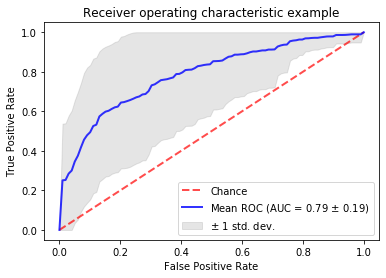

In [24]:
# %matplotlib notebook
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.7)

mean_tpr = np.nanmean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.nanstd(aucs)

ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.nanstd(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [25]:
print("----- SVM Confusion Matrix ------")
h = HTML(generate_HTML_CM(Confusion_Matrix_SVM))
display(h)

print("----- Random Forest Confusion Matrix ------")
h = HTML(generate_HTML_CM(Confusion_Matrix_RF))
display(h)

----- SVM Confusion Matrix ------


----- Random Forest Confusion Matrix ------


In [26]:
print('Total Accuracy RF:  {}'.format(accuracy_rf_total))
print('Total Accucary SVM: {}'.format(accuracy_svm_total))
print('Precision RF: {}'.format(precision_rf_total))
print('Precision SVM: {}'.format(precision_svm_total))
print(len(low_score_subjects_rf))
print(len(low_score_subjects_svm))

Total Accuracy RF:  0.6569940476190477
Total Accucary SVM: 0.7168898809523809
Precision RF: 0.6994305111248313
Precision SVM: 0.8145118769611456
0
0


In [43]:
# Only for the optimal analysis
file1 = open("low_score_rf.txt", "w") 
for i in low_score_subjects_rf:
    file1.write(i + '\n')
    
file2 = open("low_score_svm.txt", "w")
for i in low_score_subjects_svm:
    file2.write(i + '\n')

Text(0, 0.5, 'Random Forest probability for positives')

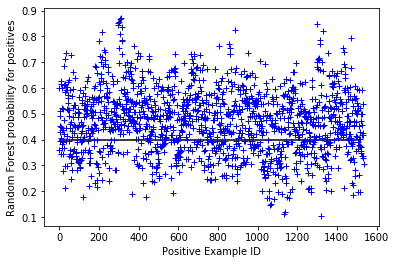

In [44]:
plt.figure(1)
plt.plot(positive_probs_rf, 'b+')
plt.hlines(0.4, 0, 1500, label='threshold')
plt.xlabel('Positive Example ID')
plt.ylabel('Random Forest probability for positives')

Text(0, 0.5, 'Random Forest probability for negatives')

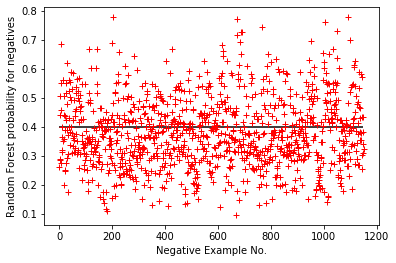

In [45]:
plt.figure(2)
plt.plot(negative_probs_rf, 'r+', )
plt.hlines(0.4, 0, 1150)
plt.xlabel('Negative Example No.')
plt.ylabel('Random Forest probability for negatives')

Text(0, 0.5, 'SVM probability for positives')

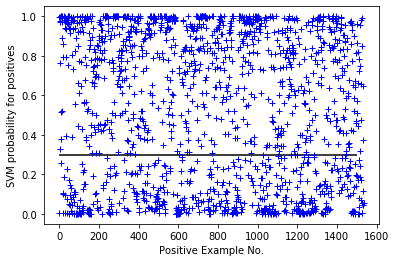

In [46]:
plt.figure(3)
plt.plot(positive_probs_svm, 'b+')
plt.hlines(0.3, 0, 1500)
plt.xlabel('Positive Example No.')
plt.ylabel('SVM probability for positives')

Text(0, 0.5, 'SVM probability for negatives')

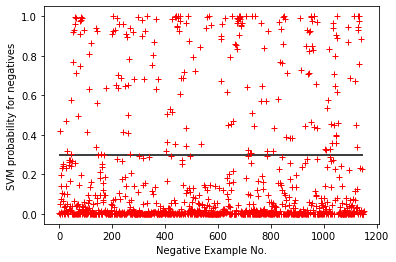

In [47]:
plt.figure(4)
plt.plot(negative_probs_svm, 'r+')
plt.hlines(0.3, 0, 1150)
plt.xlabel('Negative Example No.')
plt.ylabel('SVM probability for negatives')

### Theoretical results
The above results match the theoretical results as shown here: https://scikit-learn.org/stable/modules/calibration.html . The probabilities of the SVM are automatically calibrated when setting flag Probability=True, so there is high confidence near 0 and 1. In contrast, Random Forest probability distrubution theoretically lies around 0.2-0.3 and 0.8-0.9 according to the docs. In our plots we see that indeed for negative examples there is a dense gathering between 0.2 and 0.3, but for positive examples the borders are more spreaded. This is because (I guess) the classifier predicts True more 'easily' due to the unbalanced dataset. By using a more balanced dataset we will probably see more accurate match with the theoretical results.
All the above state that both of our classifiers are well trained.

### Positive Bias
Our initial dataset consists of 1500 positive examples and 1100 negative examples approximately. That causes the classifiers to bias their predictions towards 1. This is merely fixed by fine tunning the prediction thresholds, so we set 0.4 for RF and 0.3 for SVM. However, if the dataset was more balanced the results could be even better(?).

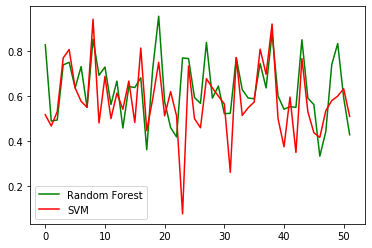

In [21]:
line1, = plt.plot(accuracy_rf_raw, 'g')
line2, = plt.plot(accuracy_svm_raw, 'r')
plt.legend((line1, line2), ("Random Forest", "SVM"))
plt.show()

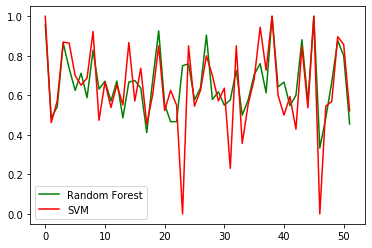

In [22]:
line3, = plt.plot(precision_rf_raw, 'g')
line4, = plt.plot(precision_svm_raw, 'r')
plt.legend((line3, line4), ("Random Forest", "SVM"))
plt.show()

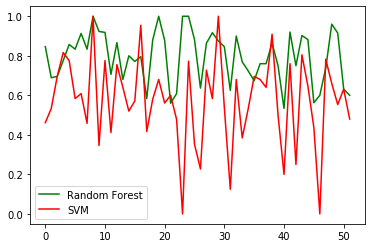

In [23]:
line5, = plt.plot(recall_rf_raw, 'g')
line6, = plt.plot(recall_svm_raw, 'r')
plt.legend((line5, line6), ("Random Forest", "SVM"))
plt.show()

In [79]:
DATASET_SIZE

2688